### Predict Price of the computer Using Statsmodels 

#### importing Libearies 

In [22]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 

#### importing Dataset 

In [24]:
data = pd.read_csv('F://Data_Set/Computer_Data.csv') 

In [25]:
data.head() 

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


Check Dataset Information 

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6259 non-null   int64 
 1   price       6259 non-null   int64 
 2   speed       6259 non-null   int64 
 3   hd          6259 non-null   int64 
 4   ram         6259 non-null   int64 
 5   screen      6259 non-null   int64 
 6   cd          6259 non-null   object
 7   multi       6259 non-null   object
 8   premium     6259 non-null   object
 9   ads         6259 non-null   int64 
 10  trend       6259 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


Check any Null Value is Present in the dataset or Not 

In [5]:
data.isnull().sum() 

Unnamed: 0    0
price         0
speed         0
hd            0
ram           0
screen        0
cd            0
multi         0
premium       0
ads           0
trend         0
dtype: int64

checking the Correlation of data 

In [6]:
data.corr() 

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend
Unnamed: 0,1.000000,-0.199924,0.388566,0.555492,0.265376,0.184699,-0.272714,0.989818
price,-0.199924,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.388566,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.555492,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.265376,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.184699,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,-0.272714,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,0.989818,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


### 1st Model Genration 

In [26]:
dataset_1 = data 

In [27]:
dataset_1.drop(['cd','multi','premium'],axis=1,inplace=True)  

#### Fitting 1st Multiple Linear Regression Model On the Dataset 

In [28]:
model_1 = smf.ols('price~speed+hd+ram+screen+ads+trend',data=dataset_1).fit() 

Test for Normality of Residuals (Q-Q Plot) of 1st Model

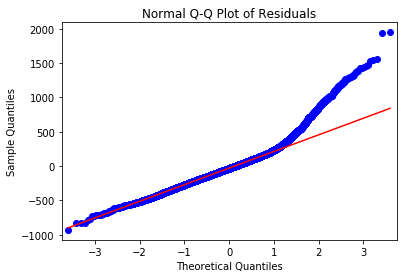

In [29]:
qqplot = sm.qqplot(model_1.resid,line='q') 
plt.title('Normal Q-Q Plot of Residuals')
plt.show() 

#### Prediction of 1st Model 

In [33]:
New_Data = pd.DataFrame({'speed':30,'hd':340,'ram':4,'screen':15,'ads':94,'trend':1},index=[1]) 

In [34]:
New_Data

,speed,hd,ram,screen,ads,trend
1,30,340,4,15,94,1


In [35]:
y1_pred = model_1.predict(New_Data) 

In [36]:
y1_pred 

1    2395.294802
dtype: float64

Summary of the 1st Model 

In [10]:
model_1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2580.
Date:                Sat, 26 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:31:29   Log-Likelihood:                -44817.
No. Observations:                6259   AIC:                         8.965e+04
Df Residuals:                    6252   BIC:                         8.969e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -246.6755     66.371     -3.717      0.000    -376.785    -116.566
speed          8.8939      0.209     42.590      0.000       8.485       9.303
hd             0.7088      0.031     22.932      0.000       0.648       0.769
ram           47.3870      1.188     39.899      0.000      45.059      49.715
screen       126.7024      4.521     28.022      0.000     117.839     135.566
ads            0.9697      0.057     17.099      0.000       0.859       1.081
trend        -47.0820      0.676    -69.660      0.000     -48.407     -45.757
==============================================================================
Omnibus:                     1407.073   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3902.981
Skew:                           1.187   Prob(JB):                         0.00
Kurtosis:                       6.054   Cond. No.                     8.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2nd Model Genration by Using Log Transformation on the Dataset 

In [14]:
dataset_2 = data 

 Log Transformation on the Dataset 

In [15]:
dataset_2['price'] = np.log(dataset_2['price']+1) 
dataset_2['speed'] = np.log(dataset_2['speed']+1) 
dataset_2['hd'] = np.log(dataset_2['hd']+1) 
dataset_2['ram'] = np.log(dataset_2['ram']+1) 
dataset_2['screen'] = np.log(dataset_2['screen']+1) 
dataset_2['ads'] = np.log(dataset_2['ads']+1) 
dataset_2['trend'] = np.log(dataset_1['trend']+1) 

#### Fitting 2nd Multiple Linear Regression Model on Log Transformed Data 

In [16]:
model_2 = smf.ols('price~speed+hd+ram+screen+ads+trend',data=dataset_2).fit()  

Test for Normality of Residuals (Q-Q Plot) of 2nd Model 

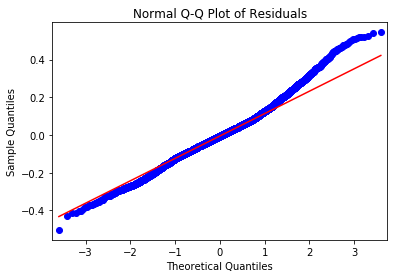

In [17]:
qqplot = sm.qqplot(model_2.resid,line='q') 
plt.title('Normal Q-Q Plot of Residuals')
plt.show() 

Sumary of 2nd Model 

In [16]:
model_2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2579.
Date:                Sat, 26 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:32:28   Log-Likelihood:                 3500.2
No. Observations:                6259   AIC:                            -6986.
Df Residuals:                    6252   BIC:                            -6939.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4759      0.094     37.000      0.000       3.292       3.660
speed          0.1961      0.005     39.572      0.000       0.186       0.206
hd             0.1026      0.006     16.978      0.000       0.091       0.114
ram            0.2384      0.006     41.353      0.000       0.227       0.250
screen         0.7769      0.033     23.583      0.000       0.712       0.841
ads            0.1600      0.004     38.355      0.000       0.152       0.168
trend         -0.2402      0.004    -62.645      0.000      -0.248      -0.233
==============================================================================
Omnibus:                      214.938   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.181
Skew:                           0.367   Prob(JB):                     5.90e-64
Kurtosis:                       3.760   Cond. No.                         559.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3rd Model Genration by using Reciprocal Transformation on the Dataset

In [18]:
dataset_3 = data 

Reciprocal Transformation of the Data Set 

In [19]:
dataset_3['price'] = 1/(dataset_3['price']+1) 
dataset_3['speed'] = 1/(dataset_3['speed']+1) 
dataset_3['hd'] = 1/(dataset_3['hd']+1) 
dataset_3['ram'] = 1/(dataset_3['ram']+1)  
dataset_3['screen'] = 1/(dataset_3['screen']+1) 
dataset_3['ads'] = 1/(dataset_3['ads']+1)  
dataset_3['trend'] = 1/(dataset_3['trend']+1)

#### Fitting 3rd Multiple Linear Regression Model on Reciprocaly Transformed Data 

In [20]:
model_3 = smf.ols('price~speed+hd+ram+screen+ads+trend',data=dataset_3).fit()   

Test for Normality of Residuals (Q-Q Plot) of 3rd Model 

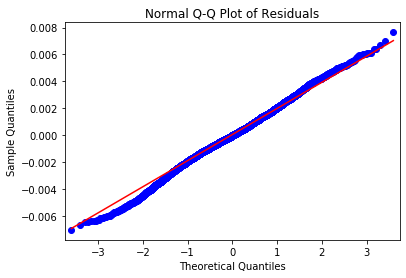

In [21]:
qqplot = sm.qqplot(model_3.resid,line='q') 
plt.title('Normal Q-Q Plot of Residuals')
plt.show() 

Summary of 3rd Model 

In [28]:
model_3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     1847.
Date:                Sat, 26 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:42:11   Log-Likelihood:                 68797.
No. Observations:                6259   AIC:                        -1.376e+05
Df Residuals:                    6252   BIC:                        -1.375e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6327      0.001    949.292      0.000       0.631       0.634
speed         -0.0248      0.001    -33.508      0.000      -0.026      -0.023
hd             0.0040      0.001      6.553      0.000       0.003       0.005
ram           -0.0023   5.81e-05    -39.808      0.000      -0.002      -0.002
screen         0.0003   1.39e-05     20.315      0.000       0.000       0.000
ads            0.0002   4.38e-06     37.867      0.000       0.000       0.000
trend       4.805e-05   1.04e-06     46.370      0.000     4.6e-05    5.01e-05
==============================================================================
Omnibus:                       22.863   Durbin-Watson:                   1.665
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.604
Skew:                           0.072   Prob(JB):                     1.01e-06
Kurtosis:                       3.292   Cond. No.                     3.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""